In [25]:
types = ["age", "edu", "incom", "job", "sex"]
columns = ["年齡層", "教育程度類別", "年收入", "職業類別", "性別"]

for item, column in zip(types, columns):
    with open(f"six_{item}_2023.csv", "r", encoding="utf-8") as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            __insert_data(
                conn,
                tablename=item,
                values=[
                    row["年"],
                    row["月"],
                    row["地區"],
                    row["產業別"],
                    row[f"{columns}"],
                    row["信用卡交易筆數"],
                    row["信用卡交易金額"],
                ],
            )

age
年齡層
edu
教育程度類別
incom
年收入
job
職業類別
sex
性別


[6.50251624e+12 6.50251624e+12 6.50251624e+12 ... 6.56814910e+12
 6.56814910e+12 6.56814910e+12]


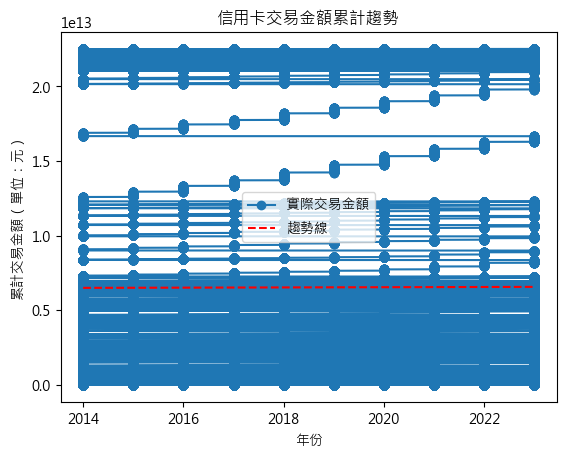

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
plt.rcParams["font.family"] = "Microsoft JhengHei"

# 讀取CSV檔案
df = pd.read_csv('../age_trans.csv')

# 將十年的信用卡交易金額相加
df['累計交易金額'] = df['信用卡交易金額[新台幣]'].cumsum()

# 準備X（年份）和y（累計交易金額）的資料
X = np.array(df['年']).reshape(-1, 1)
y = np.array(df['累計交易金額'])

# 建立線性回歸模型
model = LinearRegression()

# 適應模型
model.fit(X, y)

# 生成預測
y_pred = model.predict(X)
print(y_pred)

# 繪製折線圖和趨勢線
plt.plot(df['年'], df['累計交易金額'], marker='o', linestyle='-', label='實際交易金額')
plt.plot(df['年'], y_pred, color='red', linestyle='--', label='趨勢線')

# 添加標籤
plt.title('信用卡交易金額累計趨勢')
plt.xlabel('年份')
plt.ylabel('累計交易金額（單位：元）')

# 顯示圖例
plt.legend()

# 顯示圖表
plt.show()


In [8]:
import pandas as pd

# 讀取CSV檔案
df = pd.read_csv('../age_trans.csv')

# 根據地區分組
grouped_df = df.groupby('地區')

# 計算每個地區的「信用卡金額」的年成長率
for name, group in grouped_df:
    group['年成長率'] = (group['信用卡交易金額[新台幣]'].pct_change() * 100).fillna(0)

    # 可以將結果存儲到新的DataFrame或繪製圖表
    print(f"地區: {name}")
    print(group[['年', '月', '信用卡交易金額[新台幣]', '年成長率']])
    print("\n")


地區: 南投縣
           年  月  信用卡交易金額[新台幣]         年成長率
252252  2014  1         26821     0.000000
252253  2014  1       1578313  5784.616532
252254  2014  1       5520306   249.759902
252255  2014  1      10178812    84.388547
252256  2014  1      14568166    43.122459
...      ... ..           ...          ...
275179  2023  9      14302363   -13.813628
275180  2023  9       6905546   -51.717447
275181  2023  9       3406577   -50.668970
275182  2023  9        724855   -78.721896
275183  2023  9        387688   -46.515096

[22932 rows x 4 columns]


地區: 嘉義市
          年  月  信用卡交易金額[新台幣]         年成長率
22932  2014  1         93082     0.000000
22933  2014  1       2738338  2841.855568
22934  2014  1       8092427   195.523306
22935  2014  1      14934827    84.553126
22936  2014  1      21118032    41.401250
...     ... ..           ...          ...
45859  2023  9       7799572   -31.054226
45860  2023  9       4713413   -39.568312
45861  2023  9       1897742   -59.737413
45862  2023  9      

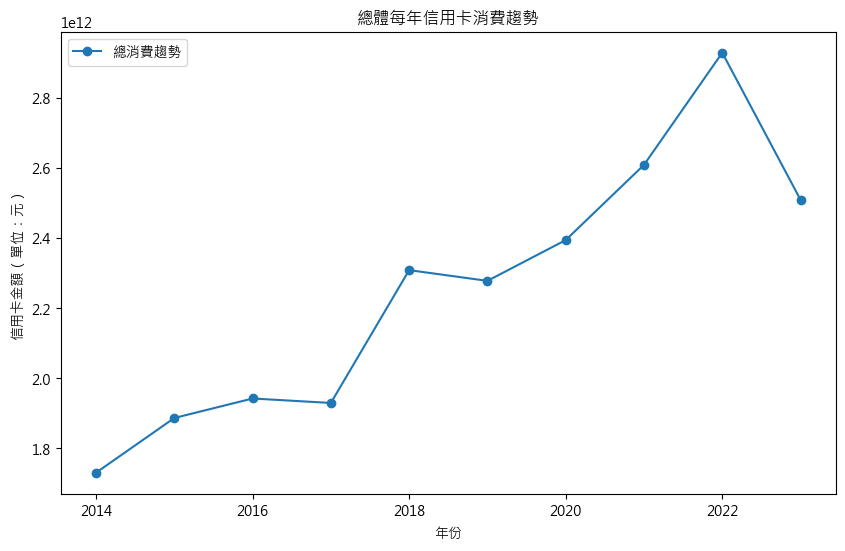

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Microsoft JhengHei"

# 讀取CSV檔案
df = pd.read_csv('../age_trans.csv')

# 根據年份分組，計算每年的信用卡消費總額
total_by_year = df.groupby('年')['信用卡交易金額[新台幣]'].sum().reset_index()

# 繪製整體每年的信用卡消費趨勢
plt.figure(figsize=(10, 6))
plt.plot(total_by_year['年'], total_by_year['信用卡交易金額[新台幣]'], marker='o', linestyle='-', label='總消費趨勢')

# 添加標籤
plt.title('總體每年信用卡消費趨勢')
plt.xlabel('年份')
plt.ylabel('信用卡金額（單位：元）')
plt.legend()



# 顯示圖表
plt.show()


c:\GitHub\ctest\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
posx and posy should be finite values
posx and posy should be finite values


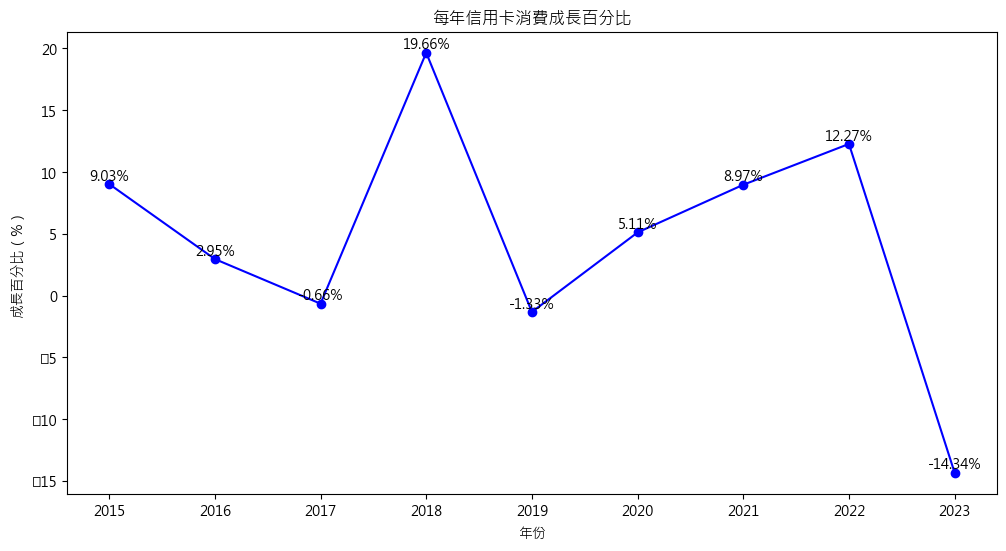

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取CSV檔案
df = pd.read_csv('../age_trans.csv')

# 根據年份分組，計算每年的信用卡消費總額
total_by_year = df.groupby('年')['信用卡交易金額[新台幣]'].sum().reset_index()

# 計算每年相對於前一年的成長百分比
total_by_year['成長百分比'] = total_by_year['信用卡交易金額[新台幣]'].pct_change() * 100

# 將每年的成長百分比列出
plt.figure(figsize=(12, 6))
plt.plot(total_by_year['年'], total_by_year['成長百分比'], marker='o', linestyle='-', color='blue')
plt.title('每年信用卡消費成長百分比')
plt.xlabel('年份')
plt.ylabel('成長百分比（%）')

# 顯示成長百分比數值
for i, value in enumerate(total_by_year['成長百分比']):
    plt.text(total_by_year['年'][i], value, f'{value:.2f}%', ha='center', va='bottom')

# 顯示圖表
plt.show()


In [2]:
import pandas as pd

# 讀取 CSV 檔案
df = pd.read_csv("../six_age.csv")

# 使用 groupby 函數將資料按照產業別進行分組
grouped_df = df.groupby('產業別')

# 計算各產業別的金額總和
sum_by_industry = grouped_df['信用卡交易金額'].sum()

# 顯示結果
print(sum_by_industry)


產業別
住       117875484284
文教康樂    298758940892
百貨      520030587997
行       259795955046
衣        60129423258
食       256524152707
Name: 信用卡交易金額, dtype: int64


In [2]:
import pandas as pd

# 讀取 CSV 檔案
df = pd.read_csv("../six_age.csv")

# 使用 groupby 函數將資料按照產業別、年和月進行分組
grouped_df = df.groupby(['產業別', '年', '月'])

# 計算各產業別的金額總和和信用卡交易筆數
result = grouped_df.agg({'信用卡交易金額': 'sum', '信用卡交易筆數': 'sum'})

# 顯示結果
result



信用卡交易金額   信用卡交易筆數
產業別  年    月                       
住    2023 1  13877415658   4376240
          2  11668757497   4104015
          3  11920558979   4227457
          4  13752671923   4266656
          5  12972925826   4274634
          6  13266011128   4300629
          7  13993547310   4516200
          8  13143171555   4551251
          9  13280424408   4371031
文教康樂 2023 1  28395417262   9802347
          2  35690851530  10290937
          3  31085849664  10364639
          4  27725310106  10136599
          5  31614388286  10392678
          6  30867431517  10188130
          7  31917027692  11055816
          8  40338713532  10806261
          9  41123951303  10577337
百貨   2023 1  66476184919  43224199
          2  50335773865  38065080
          3  53820383977  41837619
          4  58213548574  42985595
          5  58147948599  45270066
          6  54602768539  44859901
          7  57150711723  48206772
          8  59425863536  49533304
          9  61857404265  47118265
行    2023 1  25415028868  25964613
          2  26625284405  24459803
          3  30392820630  27826054
          4  28468365709  26756230
          5  30227098354  28162139
          6  29412154622  27693612
          7  30842151070  28898953
          8  29746115108  29214866
          9  28666936280  28831937
衣    2023 1   7672832688   3019830
          2   5962161092   2487057
          3   6424744508   2731406
          4   6992656668   2955271
          5   6940942662   2977560
          6   6782487343   3061275
          7   6807926362   3100024
          8   6261933881   2868185
          9   6283738054   2759738
食    2023 1  30446908782  51260272
          2  25076135660  48243611
          3  26226050193  55221963
          4  27635481216  55328261
          5  28979352463  59046064
          6  27484167853  58988817
          7  30028431011  63078027
          8  30747803361  62673219
          9  29899822168  60588227

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 讀取 CSV 檔案
df = pd.read_csv("../six_cities.csv")

# 使用 groupby 函數將資料按照產業別、年和月進行分組
grouped_df = df.groupby(['產業別', '年', '月'])

# 計算各產業別的金額總和和信用卡交易筆數
result = grouped_df.agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'})

# 將索引重置，以將 '產業別', '年', '月' 移到欄位
result = result.reset_index()

# 進行標準化
std = StandardScaler()
result1 = result[['年', '月', '信用卡交易金額[新台幣]', '信用卡交易筆數']]
arr = std.fit_transform(result1)
result[['年', '月', '信用卡交易金額[新台幣]', '信用卡交易筆數']] = arr

# 計算皮爾森相關係數
correlation_matrix = result[['年', '月', '信用卡交易金額[新台幣]', '信用卡交易筆數']].corr(method='pearson')

correlation_matrix


,年,月,信用卡交易金額[新台幣],信用卡交易筆數
年,1.000000,-0.055356,0.396846,0.462767
月,-0.055356,1.000000,0.043862,0.029156
信用卡交易金額[新台幣],0.396846,0.043862,1.000000,0.699766
信用卡交易筆數,0.462767,0.029156,0.699766,1.000000


    產業別         年         月  信用卡交易金額[新台幣]   信用卡交易筆數
0     住 -1.557121 -1.576054     -0.696815 -0.751044
1     住 -1.557121 -1.283359     -0.957368 -0.781721
2     住 -1.557121 -0.990663     -0.915268 -0.779833
3     住 -1.557121 -0.697967     -0.891599 -0.783487
4     住 -1.557121 -0.405271     -0.866868 -0.773719
..   ..       ...       ...           ...       ...
697   食  1.639075 -0.405271      1.147676  3.937411
698   食  1.639075 -0.112575      1.011904  3.932731
699   食  1.639075  0.180120      1.242939  4.267013
700   食  1.639075  0.472816      1.308263  4.233921
701   食  1.639075  0.765512      1.231261  4.063479

[702 rows x 5 columns]


<Axes: >

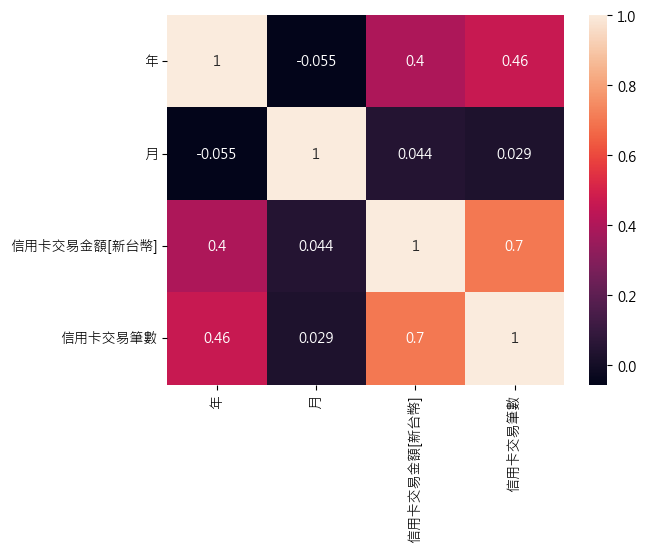

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Microsoft JhengHei"

# 讀取 CSV 檔案
df = pd.read_csv("../six_cities.csv")

# 使用 groupby 函數將資料按照產業別、年和月進行分組
grouped_df = df.groupby(['產業別', '年', '月'])

# 計算各產業別的金額總和和信用卡交易筆數
result = grouped_df.agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'})

# 將索引重置，以將 '產業別', '年', '月' 移到欄位
result = result.reset_index()

# 進行標準化
std = StandardScaler()
result1 = result[['年', '月', '信用卡交易金額[新台幣]', '信用卡交易筆數']]
arr = std.fit_transform(result1)
result[['年', '月', '信用卡交易金額[新台幣]', '信用卡交易筆數']] = arr
print(result)

# 計算皮爾森相關係數
correlation_matrix = result[['年', '月', '信用卡交易金額[新台幣]', '信用卡交易筆數']].corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True, )


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

df = pd.read_csv("../modified_six_cities.csv")
df = df[(df["產業別"] != "其他")]
dict1 = {'男性':1, '女性':2}
dict2 = {'臺北市':1, '新北市':2, '桃園市':3, '臺中市':4, '臺南市':5, '高雄市':6}
dict3 = {'食':1, '衣':2, '住':3, '行':4, '文教康樂':5, '百貨':6}
df['性別'].replace(dict1, inplace=True)
df['地區'].replace(dict2, inplace=True)
df['產業別'].replace(dict3, inplace=True)

df

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
0,2014,1,1,1,2,1,2819,2615745
1,2014,1,1,1,2,2,66270,66794381
2,2014,1,1,1,2,3,227091,263753101
3,2014,1,1,1,2,4,396113,490378285
4,2014,1,1,1,2,5,498370,618092602
...,...,...,...,...,...,...,...,...
137587,2023,9,6,4,1,10,50439,109126842
137588,2023,9,6,4,1,11,31387,57677827
137589,2023,9,6,4,1,12,16872,32315853
137590,2023,9,6,4,1,13,4559,10076219


In [18]:
km = KMeans(n_clusters=5)  #n_clusters = ? 設定分?群
km.fit(df)
km.labels_

c:\GitHub\ctest\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 0, ..., 2, 2, 2])

In [19]:
df['類別'] = km.labels_
df

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣],類別
0,2014,1,1,1,2,1,2819,2615745,2
1,2014,1,1,1,2,2,66270,66794381,2
2,2014,1,1,1,2,3,227091,263753101,0
3,2014,1,1,1,2,4,396113,490378285,3
4,2014,1,1,1,2,5,498370,618092602,3
...,...,...,...,...,...,...,...,...,...
137587,2023,9,6,4,1,10,50439,109126842,0
137588,2023,9,6,4,1,11,31387,57677827,2
137589,2023,9,6,4,1,12,16872,32315853,2
137590,2023,9,6,4,1,13,4559,10076219,2


# 線性回歸

In [2]:
import pandas as pd

# 讀取資料集
df = pd.read_csv("../age_trans.csv")

# 排除產業別為 "其他"
df = df[(df["產業別"] != "其他")]

# 保留六都的資料，假設六都的地區為 ["台北", "新北", "桃園", "台中", "台南", "高雄"]
six_cities = ["臺北市", "新北市", "桃園市", "臺中市", "臺南市", "高雄市"]
df_six_cities = df[df["地區"].isin(six_cities)]

# 儲存處理後的資料
df_six_cities.to_csv("processed_dataset.csv", index=False)

In [18]:
import pandas as pd

# 讀取資料集
df = pd.read_csv("../age_trans.csv")

# 排除產業別為 "其他"
df = df[(df["產業別"] != "其他") & (df["年齡層"] != "未滿20歲")]

# 保留六都的資料，假設六都的地區為 ["台北", "新北", "桃園", "台中", "台南", "高雄"]
six_cities = ["臺北市", "新北市", "桃園市", "臺中市", "臺南市", "高雄市"]
df_six_cities = df[df["地區"].isin(six_cities)]

# 儲存處理後的資料
df_six_cities.to_csv("processed_dataset_no20.csv", index=False)

In [16]:
import pandas as pd

# 讀取資料集
df = pd.read_csv("../age_trans.csv")

# 排除產業別為 "其他"
df = df[(df["產業別"] != "其他")]

# 保留六都的資料，假設六都的地區為 ["台北", "新北", "桃園", "台中", "台南", "高雄"]
six_cities = ["臺北市", "新北市", "桃園市", "臺中市", "臺南市", "高雄市"]
df_six_cities = df[df["地區"].isin(six_cities)]

# 將信用卡交易金額以千萬為單位
df_six_cities["信用卡交易金額[新台幣]"] = df_six_cities["信用卡交易金額[新台幣]"] / 1e7

# 信用卡筆數以萬為單位
df_six_cities["信用卡交易筆數"] = df_six_cities["信用卡交易筆數"] / 1e4

# 儲存處理後的資料
df_six_cities.to_csv("processed.csv", index=False)


C:\Users\User\AppData\Local\Temp\ipykernel_18484\801293603.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_six_cities["信用卡交易金額[新台幣]"] = df_six_cities["信用卡交易金額[新台幣]"] / 1e7
C:\Users\User\AppData\Local\Temp\ipykernel_18484\801293603.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_six_cities["信用卡交易筆數"] = df_six_cities["信用卡交易筆數"] / 1e4


均方誤差: 187.231035531417
R平方值: 0.5559615020102127


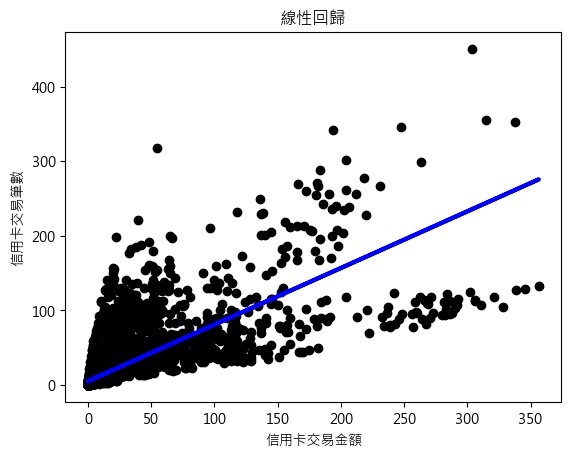

In [17]:
# 引入必要的套件
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Microsoft JhengHei"

# 讀取資料集
df = pd.read_csv("./processed.csv")

# 假設 '信用卡交易筆數' 為特徵，'信用卡交易金額[新台幣]' 為目標變數
X = df[["信用卡交易筆數"]]
y = df["信用卡交易金額[新台幣]"]

# 分割資料集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 建立線性回歸模型
model = LinearRegression()

# 訓練模型
model.fit(X_train, y_train)

# 進行預測
y_pred = model.predict(X_test)

# 評估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"均方誤差: {mse}")
print(f"R平方值: {r2}")

# 繪製散點圖和回歸線
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.xlabel("信用卡交易金額")
plt.ylabel("信用卡交易筆數")
plt.title("線性回歸")
plt.show()

Mean Squared Error: 18788229435.549854
R-squared: 0.5559494636004163


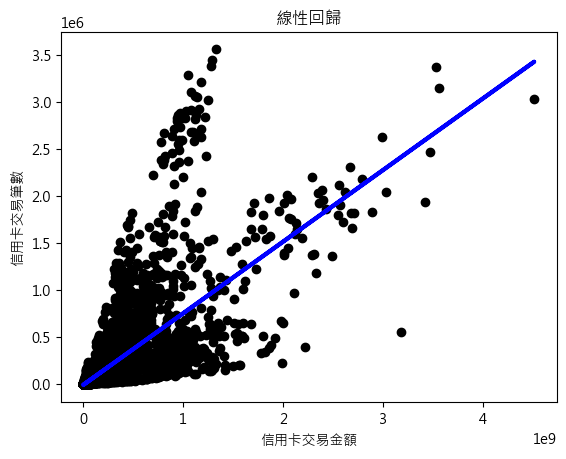

In [19]:
# 引入必要的套件
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Microsoft JhengHei"
# 讀取資料集
df = pd.read_csv("./processed_dataset.csv")  #未排除未滿20歲

# 假設 '信用卡交易金額' 為特徵，'信用卡交易筆數' 為目標變數
X = df[["信用卡交易金額[新台幣]"]]
y = df["信用卡交易筆數"]

# 分割資料集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 建立線性回歸模型
model = LinearRegression()

# 訓練模型
model.fit(X_train, y_train)

# 進行預測
y_pred = model.predict(X_test)

# 評估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



# 印出評估指標
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# 繪製散點圖和回歸線
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.xlabel("信用卡交易金額")
plt.ylabel("信用卡交易筆數")
plt.title("線性回歸")
plt.show()

Mean Squared Error: 19660786127.59914
R-squared: 0.5770664704007414


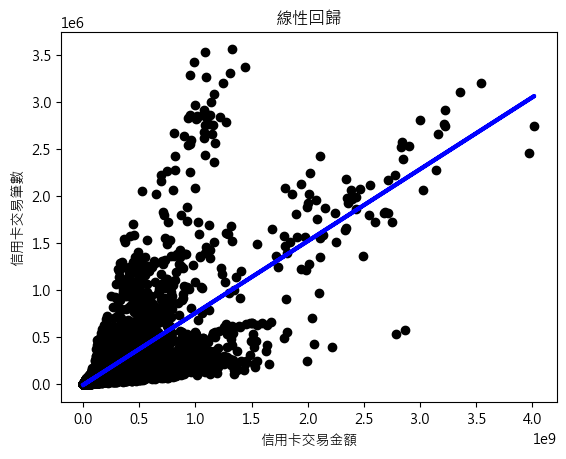

In [21]:
# 引入必要的套件
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 讀取資料集
df = pd.read_csv("./processed_dataset_no20.csv")  #排除未滿20歲

# 假設 '信用卡交易金額' 為特徵，'信用卡交易筆數' 為目標變數
X = df[["信用卡交易金額[新台幣]"]]
y = df["信用卡交易筆數"]

# 分割資料集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 建立線性回歸模型
model = LinearRegression()

# 訓練模型
model.fit(X_train, y_train)

# 進行預測
y_pred = model.predict(X_test)

# 評估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# 印出評估指標
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# 繪製散點圖和回歸線
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.xlabel("信用卡交易金額")
plt.ylabel("信用卡交易筆數")
plt.title("線性回歸")
plt.show()